# csvファイルの入力

この単元では，`csv`ライブラリを使ったファイル操作について学んでいく。

**一般的なファイル操作でも必要**な内容を含んでいるので、しっかり理解しよう。

## この章の目標

* 「ライブラリ」のインポート方法を知る。

* 「csvファイルの入力」の方法を理解する。

  → **csvファイルの入力方法を覚えて実践的なプログラミングに備えよう！**

## 0. 問題設定

---
あなたはある駅近くにある小売店Sの、仕入れ補助のための日々の売上予測をするプロジェクトに配属されました。

手元には過去の、1日ごとの最寄り駅の乗降者数と、対応する日のS店の売上が記録されたcsvデータ "hello_csv.csv" があります。

---

このデータをPythonで確認できるようにしよう。

### txtで開いてみる

csvファイルをPythonで確認する前に、まずはtxtで開いてみよう。

ファイル末尾の拡張子を```.txt```に変更するか、右クリックで「プログラムから開く」→「メモ帳」を選択する。

<p>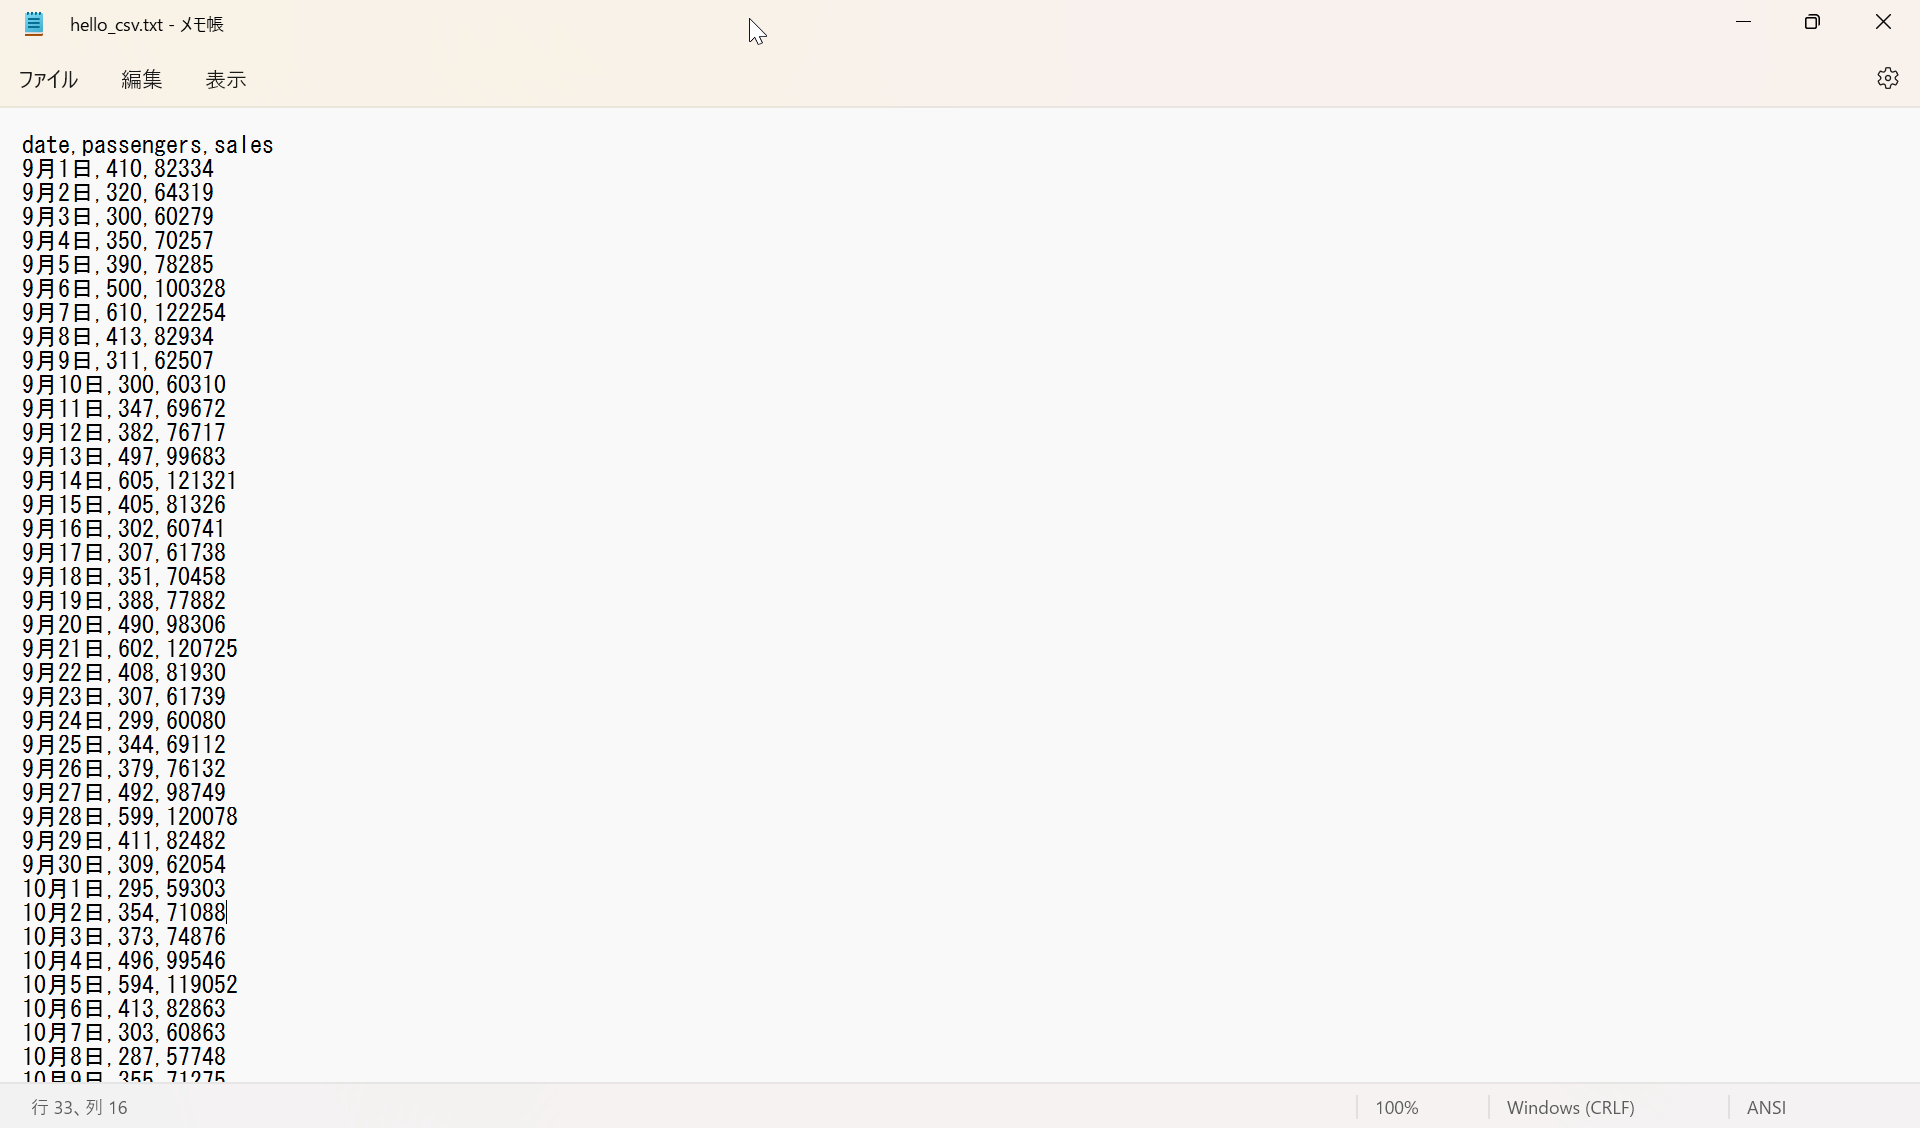</p>

csvデータはこのように、カンマで各データが区切られた形式のファイルになっている。

### excelで開いてみる

次に、excelで開いてみよう。

<p>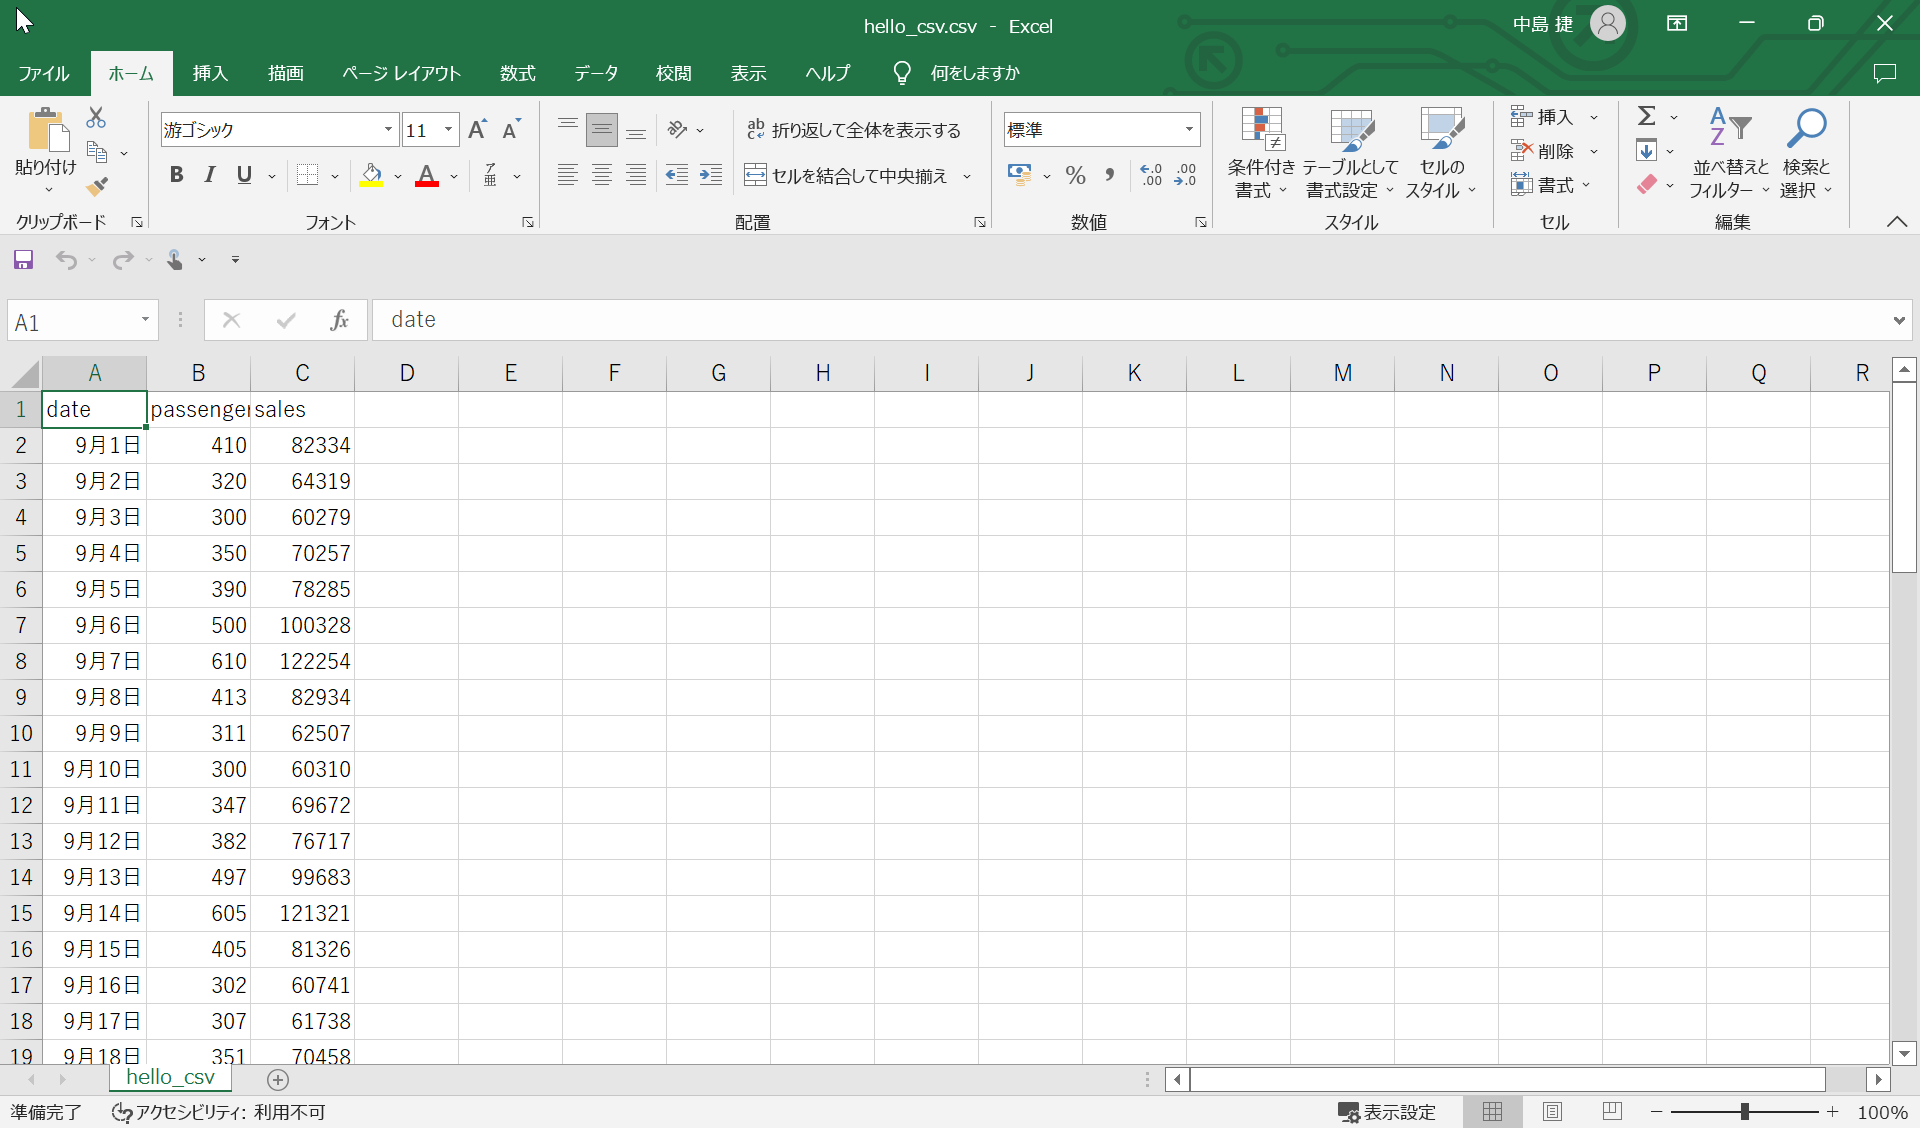</p>

このようにcsvファイルをexcelで開くこともできる。

## 1. csvライブラリのインポート

ライブラリ：便利なプログラム(関数)がまとまっているファイルのこと  

csvというライブラリに入った関数を使うことでcsvファイルを読み込むことができる。

【例題】`csv`ライブラリをインポートしよう．

In [ ]:
import csv

**解説**
* `csv`という名前のライブラリを呼び出している
* ライブラリを呼び出す方法：`import ライブラリ名`

**注意**
- importを忘れると以降のプログラムでエラーが発生するため、忘れず実行しよう

## 2. ファイルの入力

まずは、ファイルの読み込みからだ。

【例題】`hello_csv.csv`の中身を表示しよう。最初に，ファイルをプログラムに読み込む。

In [ ]:
with open('hello_csv.csv', encoding="shift_jis") as f:
    print(f)

**解説**
- `with open() as f`を使うことで，　ファイルをプログラムに読み込むことができる．
    - `as f`により，読み込んだファイルを**`f`**として使用できる。
    - 通常`open`関数を使うと`close`関数が末尾に必要になるが、`with open`を使うと自動でcloseしてくれる。
    
    <br>

- `with`は`for文`や`if文`のように**:**で行を終え、次の行にインデントを設ける。
    - インデントのある部分だけファイルを開いており，**`f`**もこの中でしか使えない。
    
    <br>

- `open()`の引数は`ファイル名`だ．ディレクトリが違う場合は絶対パスも添えて書く必要がある。

- `encoding="shift_jis"`はエンコードの指定だ。OSによって文字コードの変更が必要になる場合がある。

次は、`<_io.TextIOWrapper name='hello_csv.csv' mode='r' encoding='shift_jis'>`では意味が分からないので、**`f`を読める形に直す。**  

In [ ]:
with open('hello_csv.csv', encoding="shift_jis") as f:
    data = f.read()
print(data)

読み込めてはいるが、csvファイルをただの文字列として格納しているため、非常に扱いづらい。

そこで、改行・カンマで区切って各要素を格納してくれる便利な関数を用いる。

具体的には、`csv.reader()`を使うことで、「`f`を`csv`として認識した`reader`に変換」し、その後，「1行ずつ`data（リスト変数）`に追加」する。 

最後に、`data`を表示すれば**元のcsvファイルを2次元リストとして表示**することができる。

In [ ]:
data = []
with open('hello_csv.csv', encoding="shift_jis") as f:
    reader = csv.reader(f)
    for line in reader:
        data.append(line)
print(data)

**解説**

- `reader`は`f`をcsv形式で認識した変数だ．  
    - 「**`,`**（カンマ）」区切りで列を，「**`\n`**（改行）」ごとに行を認識している．
- `reader`はそのまま参照することができないので，1行ずつ`for文`で`data`に追加している．  
    - `line`は1行のデータであり，各属性を要素にもつリストである．


【問題】`hello_csv_2.csv`を読み込んで表示してみよう．

- 例題と同様の手順を踏めばOK。

## 3. 乗降者数からの売上予測

読み込んだ小売店Sのデータを使って、乗降者数から売り上げを予測した。

その式は`sales = 200 * passengers + 300`である。

【例題】この予測値をcsvデータに追加して新たなcsvファイルとして出力し、その結果をexcelで見てみよう。

まず、csvデータの中身を取り出してデータリスト`data`に格納し、予測値を作成する準備とする。

In [ ]:
data = []
with open('hello_csv.csv', encoding="shift_jis") as f:
    reader = csv.reader(f)
    for line in reader:
        data.append(line)
print(data)

次に、入れ子リストの各要素`['9月1日', '410', '82334']`,...に対して、2番目の値`passengers`から予測値`pred`を計算する。

このとき`'410'`がstr型になっているので、`int`で型を変換する。

【例題】int型の数値`passangers`を受け取り、予測値`pred`を出力する関数`prediction`を作成しよう。

In [ ]:
def prediction(passengers):
    pred = passengers * 200 + 300
    return pred

予測値`pred`をstr型に戻して、新たなデータリスト`data2`を作成する。

In [ ]:
data2 = []
header = ['date', 'passengers', 'sales','predict']
data2.append(header)

for line in data[1:]:
    passengers = int(line[1])
    pred = prediction(passengers)
    line.append(str(pred))
    data2.append(line)
    
print(data2)

最後にこのデータリスト`data2`をcsvに出力する。

In [ ]:
with open('sample_writer.csv', 'w', encoding="shift_jis") as f:
    writer = csv.writer(f)
    writer.writerows(data2)

出力したデータを再度読み込んで、正しく書き込めているか確認しよう。

In [ ]:
with open('sample_writer.csv', encoding="shift_jis") as f:
    print(f.read())

なお、このデータをexcelで見てみると以下のようになる。

<p>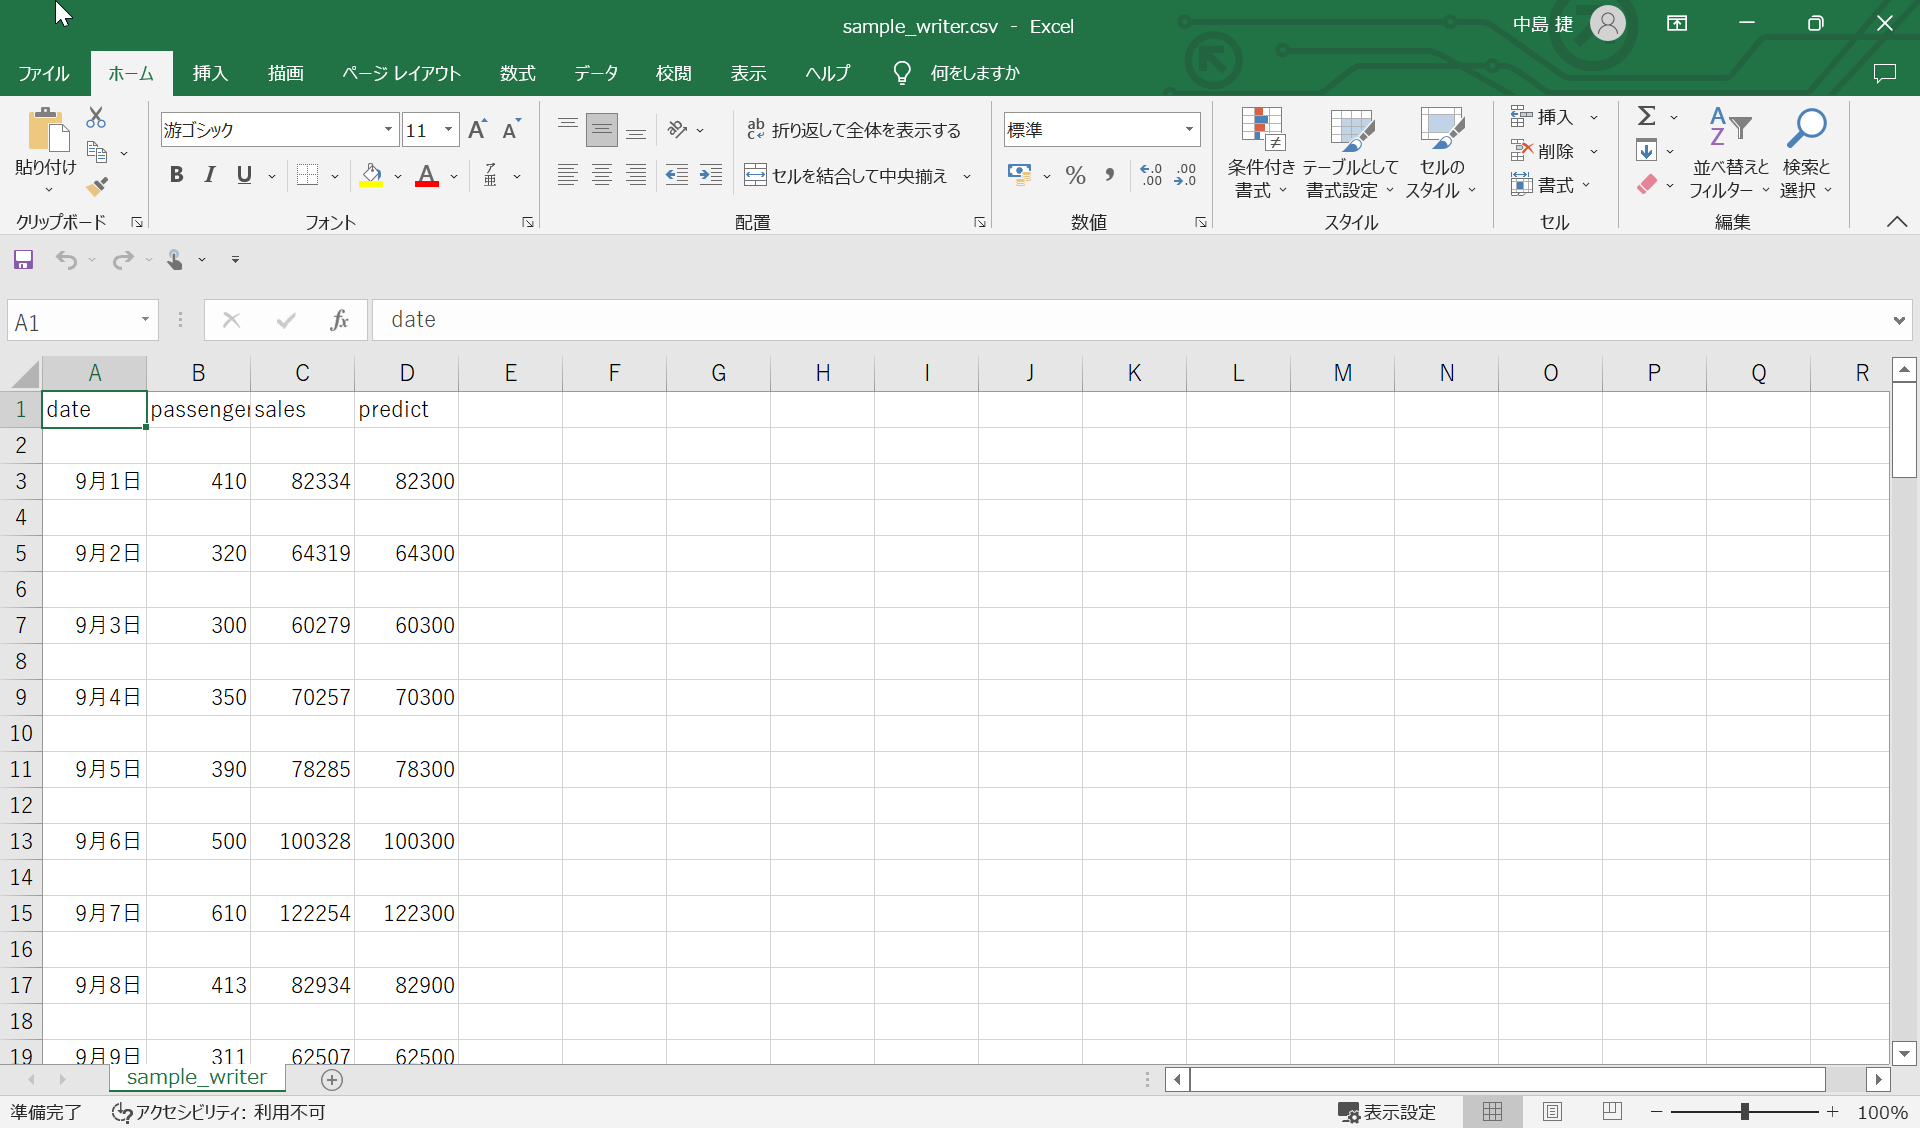</p>